## POLSCI 3

## Week 3, Lecture 2: Correlation

### Goals of this Notebook Lecture

In class yesterday, we learned how to calculate the average and standard deviation of a variable in R, and also how to convert a variable to standard units.

Now, we'll use that knowledge to understand the correlation coefficient.

The correlation coefficient can be a very useful summary of association.  However, as we will see, it is a measure of **linear association**.  We'll therefore consider some problem cases for correlation---especially when variables are associated but in a non-linear manner.  We'll also mention how to think about the influence of outliers.

First, let's load the happiness data.

In [16]:
happiness_data <- read.csv('happiness_polity_2018.csv')

Remember that this dataset contains data from world countries in terms of factors such as happiness levels, political categories, and demographic information. Here again is the codebook:

- <code>polity2</code>: The "Polity Score" of the country, which measures its political system on a 21-point scale ranging from -10 (hereditary monarchy) to +10 (consolidated democracy).
- <code>polity2_cat</code>: The political category the country is identified within "autocracies" are on one end of the spectrum, "anocracies" are in the middle (semi-democracies), and "democracies" are at the top of the spectrum.
- <code>gdpcapita</code>: GDP per capita (economic output per person)
- <code>gdpcapita_cat</code>: GDP/income category that the country falls into (based on GDP per capita)
- <code>happiness</code>: The country's happiness index, measured through surveys that require participants to rank their level of happiness based on an assortment of quality-of-life factors
- <code>happiness_cat</code>: Happiness category that the country falls into (based on happiness indicator)
- <code>life_expectancy</code>: Average life expectancy in years
- <code>life_expectancy_cat</code>: Life Expectancy category that the country falls into

## Calculating the correlation coefficient

With yesterday's lecture under your belt, the steps for calculating the correlation coefficient are simple.  To calculate the correlation of any two variables, 

- First convert each variable to standard units.  (Review: this means you subtract the average, then you divide by the standard deviation).
- Then you multiply the two variables (both in standard units).
- You take the sum of all the products (i.e., what you get when you multiple the variables together).
- You divide by the number of products to get the average.

For example, if you want to calculate the correlation of life expectancy and happiness, you first have to convert the value of each variable to standard units, for each variable in the dataset.  

Take Afghanistan. In class, we calculated the difference from average life expectancy as follows:

In [19]:
ave_life_expectancy <- mean(happiness_data$life_expectancy) # Calculate average life expectancy
afghanistan <- subset(happiness_data, countryname=="Afghanistan") # Get the data just for Afghanistan
afghan_diff <- afghanistan$life_expectancy - ave_life_expectancy # Calculate the difference
afghan_diff # Print the difference

[1] -11.85384

So in terms of standard deviations, this difference is:

In [21]:
sd_life_expectancy <- sd(happiness_data$life_expectancy) # Calculate the SD of life expectancy
afghanistan_standardized_life_expectancy <- afghan_diff /sd_life_expectancy
afghanistan_standardized_life_expectancy

[1] -1.731629

In [ ]:
Afghanistan is -1.73 standard deviations below average life expectancy.

Now, we can do the same thing for happiness:

In [22]:
ave_happiness <- mean(happiness_data$happiness) # Calculate average happiness
afghan_diff_happiness <- afghanistan$happiness - ave_happiness # Calculate Afghanistan's difference from average happiness
afghan_diff_happiness # Print the difference

[1] -2.819916

In terms of standard deviation units, this difference from average happiness is:

In [23]:
sd_happiness <- sd(happiness_data$happiness) # Calculate the SD of happiness
afghanistan_standardized_happiness <- afghan_diff_happiness /sd_happiness
afghanistan_standardized_happiness

[1] -2.600468

Afghanistan is 2.6 standard deviations below the mean in terms of average happiness...

Now, the product of the two standardized variables, for Afghanistan, is just

In [24]:
(afghanistan_standardized_life_expectancy)*(afghanistan_standardized_happiness)

[1] 4.503045

So, to calculate the correlation coefficient, we do the same thing for every country in the dataset... Norway, South Africa, the United States, and so on.  

Then, we add up all the products (i.e., the multiplications); and we divide by the number of countries (here, 131).  

This gives us the average of all the products---i.e. of the standardized values of each variable, for each country.

This average is the correlation coefficient.

## Understanding correlation

Why does this work?

Let's consider the scatterplot of life expectancy against happiness we looked at in class.  

For this plot, it will be useful to depict the averages of both variables, so let's calculate them again (as we did in class yesterday).  

In [26]:
ave_life_expectancy <- mean(happiness_data$life_expectancy)
ave_happiness <- mean(happiness_data$happiness)

The average life expectancy in the countries in our data set is about **64.5 years**, and the average happiness score (life evaluation) is about **5.5**.

In the plot, I am going to add **red lines** to denote the average values of each variable and also highlighting and enlarging the points for Norway and Afghanistan.  

Don't worry if you do not understand the code I am using here (but the code is shown in case you are interested in digging deeper)...

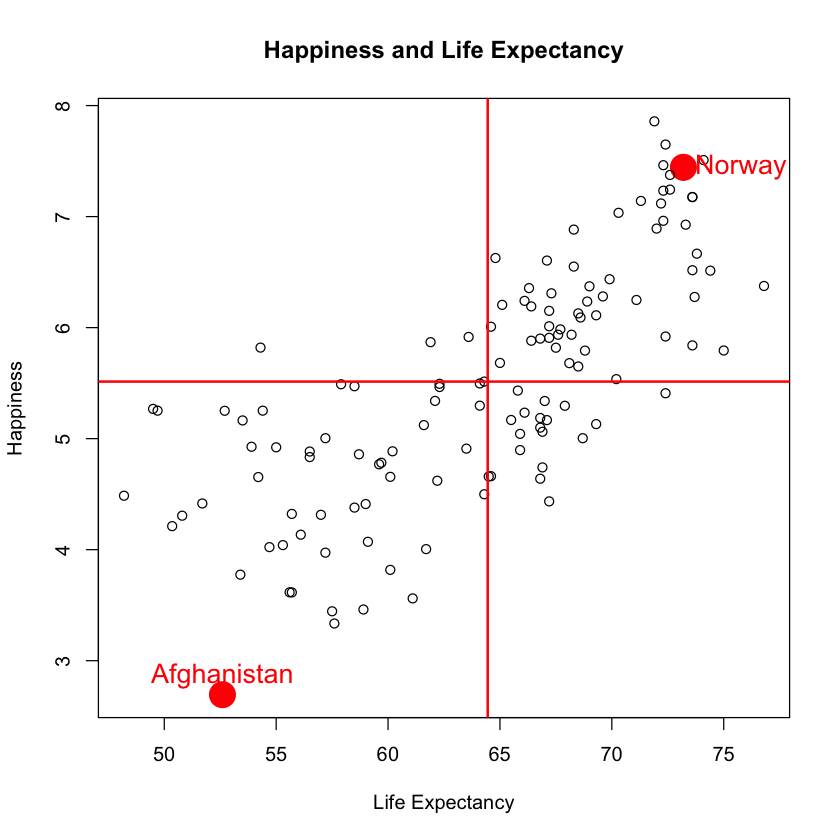

In [59]:
# Code to produce a scatterplot of happiness against life expectancy, 
# with red lines at the average values of each variable,
# and red filling and country names for Norway and Afghanistan

point_colors <- ifelse(happiness_data$countryname=="Norway"| happiness_data$countryname=="Afghanistan", "red", "black")
point_pch <- ifelse(happiness_data$countryname=="Norway"| happiness_data$countryname=="Afghanistan", 16, 1)
point_cex <- ifelse(happiness_data$countryname=="Norway"| happiness_data$countryname=="Afghanistan", 3, 1)

plot(happiness_data$life_expectancy, happiness_data$happiness, col=point_colors, pch=point_pch, cex = point_cex, main="Happiness and Life Expectancy", xlab="Life Expectancy",ylab="Happiness")
abline(h = ave_happiness, col = "red", lwd = 2) # This line adds a horizontal line at the average value of happiness
abline(v = ave_life_expectancy, col = "red", lwd = 2) # This line adds a vertical line at the average value of life expectancy

point_to_Norway_index <- which(happiness_data$countryname == "Norway")
text(x = happiness_data$life_expectancy[point_to_Norway_index],
     y = happiness_data$happiness[point_to_Norway_index],
    labels = happiness_data$countryname[point_to_Norway_index],
     pos = 4,  # Position to the right of the point
     col = "red",
     cex = 1.35 # Make text slightly larger
)
point_to_Afghanistan_index <- which(happiness_data$countryname == "Afghanistan")
text(x = happiness_data$life_expectancy[point_to_Afghanistan_index],
     y = happiness_data$happiness[point_to_Afghanistan_index],
    labels = happiness_data$countryname[point_to_Afghanistan_index],
     pos = 3,  # Position above the point
     col = "red",
     cex = 1.35 # Make text slightly larger
)


Notice that **Norway**, in the upper-right quadrant, is **above average** on **life expectancy**; and it is also **above average** on **happiness**.  

Thus, the difference from average life expectancy is a **positive** number; and the difference from average happiness is **positive** as well.  

Thus, for Norway, the **product of the two variables is positive** (since a positive number times a positive number is positive).

Conversely, for Afghanistan, in the lower-left quadrant, the difference from average life expectancy is **negative**; but so is the difference from average happiness.  Thus, the product is **again positive** (since a negative times a negative is also a positive).

In fact, most points in this scatterplot lie in the upper-right or lower-left quadrants. 

And for all those points, the product of the values of the variables---once put in standard units---is positive.

And that is why the correlation coefficient is also positive. Let's check:

In [44]:
cor(happiness_data$life_expectancy, happiness_data$happiness)

[1] 0.754291

A correlation of 0.75 is very strongly positive. (We'll discuss more later the fact that correlations always vary between -1 and 1).

Conversely, consider the association between the happiness score and the Polity measure of democracy, with lines added again at the averages of the variables:

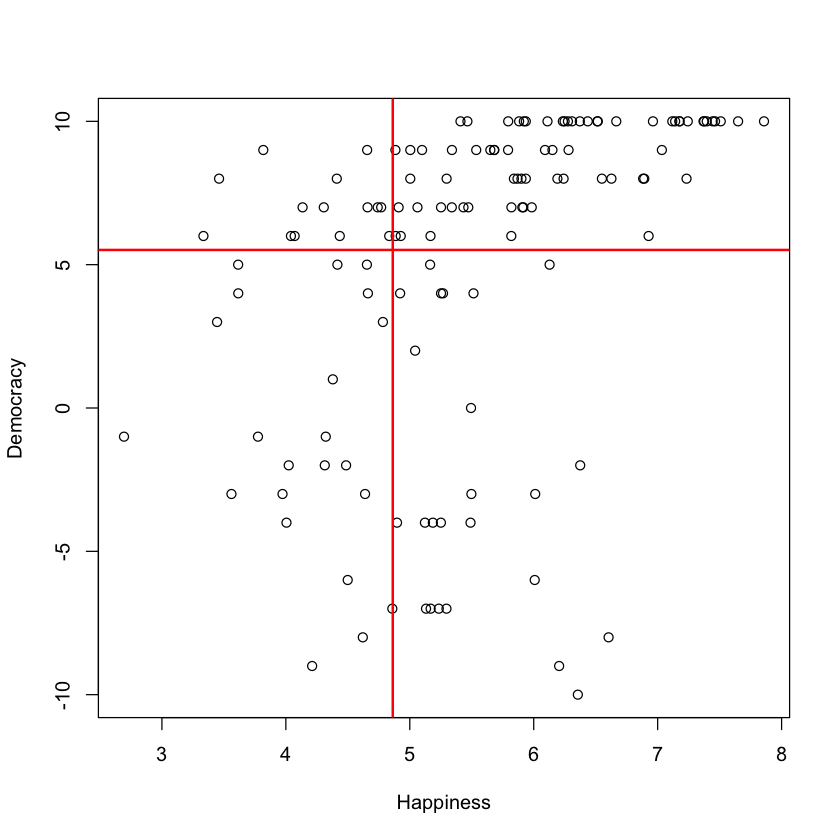

In [57]:
ave_democracy <- mean(happiness_data$polity2)
plot(happiness_data$happiness,happiness_data$polity2, xlab="Happiness",ylab="Democracy")
abline(h = ave_happiness, col = "red", lwd = 2) # This line adds a horizontal line at the average value of happiness
abline(v = ave_democracy, col = "red", lwd = 2) # This line adds a vertical line at the average value of life expectancy


Here, there are more values in all four quadrants.  Thus, while many products of the two variables (happiness and democracy), once put in standard units, will be positive, more of them will be negative (namely, the points in the lower-right and upper-left quadrants). 

We might therefore expect the negative values the pull down the average of the products. Let's check if that happens!

In [58]:
cor(happiness_data$happiness,happiness_data$polity2)

[1] 0.4064132

So the coeffficent of correlation between happiness and democracy, of about 0.41, is indeed weaker than the coefficient of correlation between life expectancy and happiness.

In the in-class assignment tomorrow, I'll ask you to produce a scatter plot for two variables in the data set and then calculate the correlation coefficient -- just like we've done here.  (You won't have to worry about producing the vertical lines or axis labels!).

### Some notes on notation

Often, the correlation coefficient is referred to using the notation $r$. 

For example, $r=0..75$ means that the correlation coefficient is 0.75.

Another fact to note is that correlations always vary between -1 and 1.  We won't show that formally (i.e., with math) here, but it is not too hard to show.  We can illustrate it with the following simulated data, however:

Suppose now that the y variable is just a linear function of the x variable:

In [64]:
# Setting a "seed" is useful when using a random-number generator like the function runif we use in this code cell 
# This ensures we get the same result each time we run the code
set.seed(4321)
x <- runif(100, min=-2.5, max=2.5)
y <- x + 1


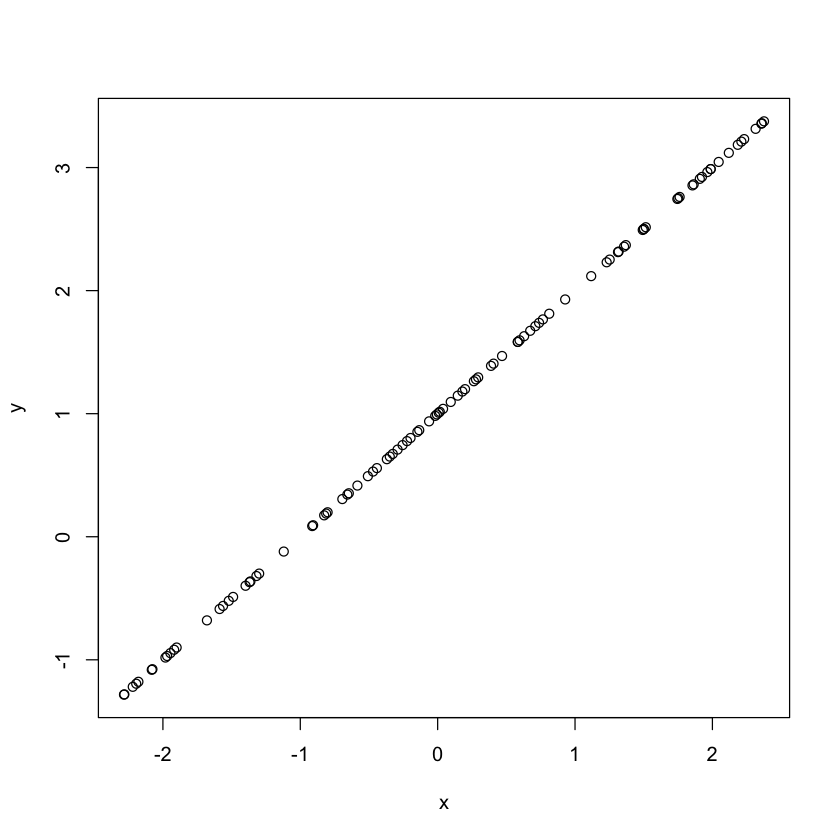

In [65]:
plot(x,y)

In [66]:
cor(x,y)

[1] 1

The correlation between the two variables is 1: all the points lie along a line!

In [ ]:
Alternately, we could create variables that are perfectly negatively correlated as follows:

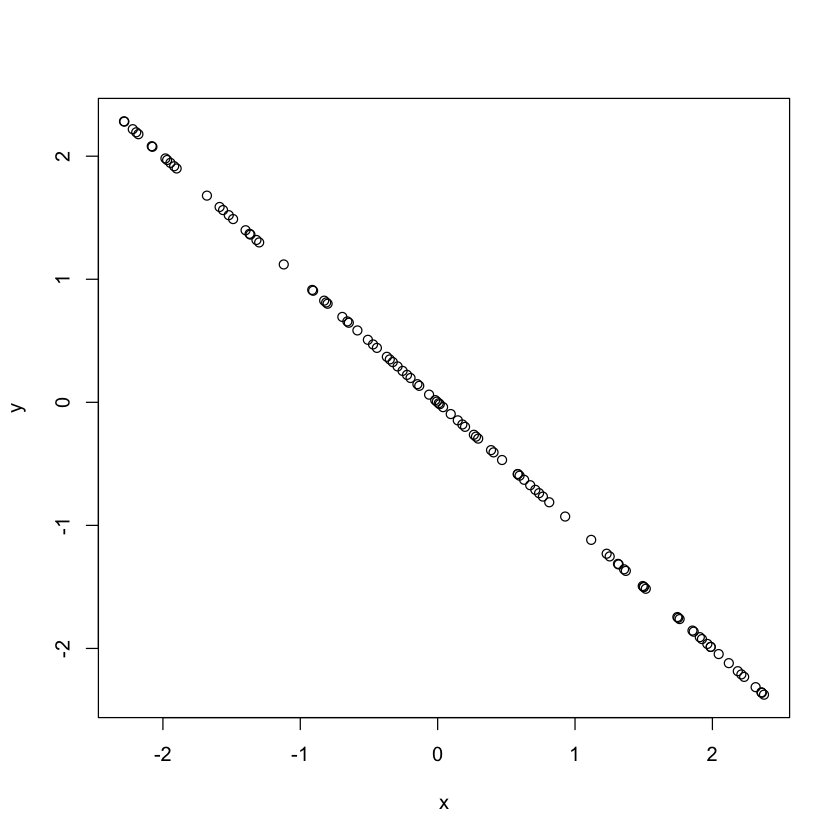

In [67]:
y <- -x # here, y is just the negative of x
plot(x,y)

The correlation is then -1:

In [68]:
cor(x,y)

[1] -1

You can see the correlation coefficient as a measure of how "spread out" the points are, relative to a plot in which they are all in a line: in general, the more spread out they are, the weaker (i.e, the closer to zero) the correlation is. 

Conversely, when the points all fall in a line, the correlation is 1 (for positive correlation), or -1 (for negative correlation).

## Problem cases for the correlation coefficient

The correlation coefficient is a useful measure of **linear association**. However, it is less useful when variables are associated **non-linearly**.  The measure is also sensitive to outliers.  Let's discuss each of those in turn.

### Non-linear associations


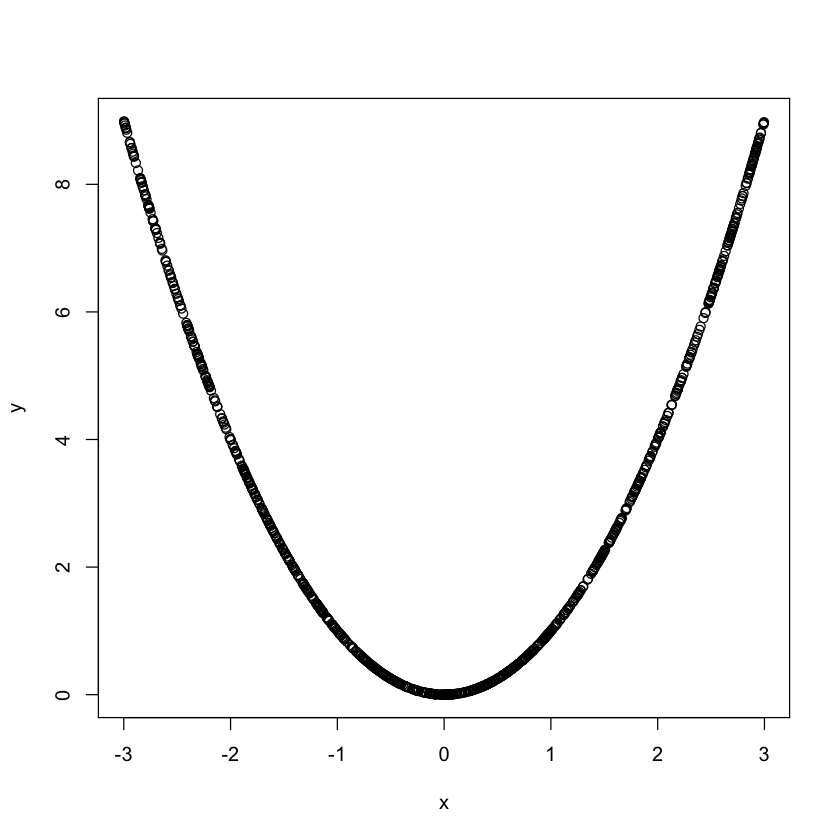

In [69]:
# Here we generate 1000 observations of the variable x, with a minimum value of -3 and a maximum value of 3 
# Don't worry too much about the syntax for this now!

set.seed(1234) # Make sure we get the same result each time we run the code
x <- runif(1000,min=-3,max=3) 

# Now we generate the variable y as the square of x
y <- x^2 

# Finally, let's create a scatterplot of y against x using the plot() function
plot(x,y)

Let's check the correlation of x and y:

In [70]:
cor(x,y) 

[1] 0.0514268

The correlation is close to zero -- but clearly there is a strong (non-linear!) association between x and y!

So the correlation coefficient is not very useful for describing this non-linear association.

### Outliers

Another issue is that the correlation coefficient can be sensitive to outliers.

Recall our the first simulated dataset above, the correlation between x and y was 1:

In [75]:
set.seed(4321)
x <- rnorm(100)
y <- x + 1
cor(x,y)

[1] 1

But now suppose we add an outlier: that is, a single point that is very far from the others.  

We'll do this by changing the value of the final (the 100th) data point, as follows:

In [76]:
x[100] <- 4 # The brackets here indicate that we are assigning a value of "4" to x for the 100th observation.
y[100] <- -4 # And the same for y...

Now let's plot the result. 

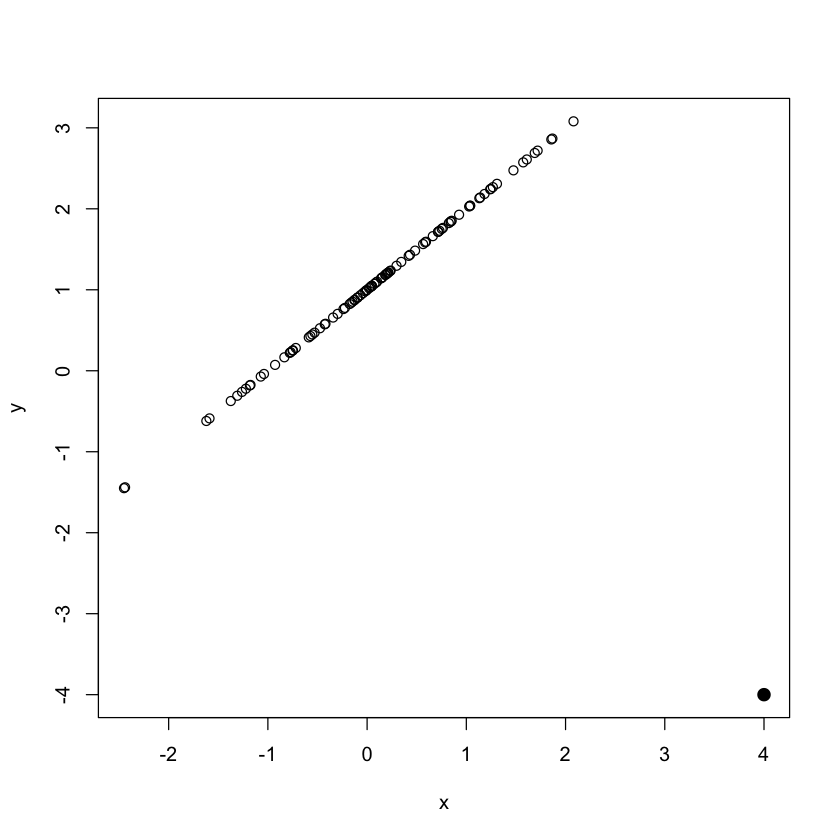

In [73]:
plot(x,y)
points(x[100], y[100], col = "black", pch = 16, cex = 1.5)

 Notice the outlier in the bottom-rigth of the plot. This substantially affects the correlation.  Let's check:

In [77]:
cor(x,y)

[1] 0.6061512

Whereas without the outlier the correlation coefficient was r-1---all the points lay in a line---now it is around r=0.61.  Thus, the correlation is much weaker, simply because of the outlier!


Should we ignore the outlying data point?  It really depends.  Sometimes, an outlier can be cause to investigate more deeply the process that might have produced a deviant value.  This can produce new theoretical insights and new empirical hypotheses to test.  Other times, ignoring an outlier might be legitimate.  But it depends a lot on the social-scientific questions being studied.  We may consider this issue further in the future. 

## Review

In this lecture, you learned
- How to calculate the correlation coefficient;
- How to interpret it; and
- Some of the problems when we use correlation coefficients to characterize non-linear associations, or scatterplots with large outliers.


## Further reading

For some of the material covered in this chapter, read the following optional chapter posted on bCourses:

Freedman, David, Robert Pisani, and Roger Purves. 2007. *Statistics*  New York: W.W. Norton & Company, Fourth Edition. Chapter Eight ("Correlation")


